In [1]:
%matplotlib inline
from scapy.all import *
import matplotlib.pyplot as plt
import os

In [58]:
filePath = ['multipurpose_move_only.pcapng', 'multipupose_open_close_only.pcapng', 'multipurpose_open_close_accel.pcapng', 'bulb_OnOff.pcapng', 'bulb_dimming.pcapng'  ]

In [33]:
packets = rdpcap(os.path.join( '/home/omid/research/iot/IoT-Project/files/', 'multipupose_open_close_only.pcapng' ))
packets_2= rdpcap(os.path.join( '/home/omid/research/iot/IoT-Project/files/', 'multipurpose_open_close_accel.pcapng' ))

In [34]:
packets

<multipupose_open_close_only.pcapng: TCP:102 UDP:4 ICMP:0 Other:8>

In [35]:
for packet in packets:
    # We're only interested packets with a DNS Round Robin layer
    if packet.haslayer(DNSRR):
        # If the an(swer) is a DNSRR, print the name it replied with.
        if isinstance(packet.an, DNSRR):
            print(packet.an.rrname)

b'fw-update2.smartthings.com.'


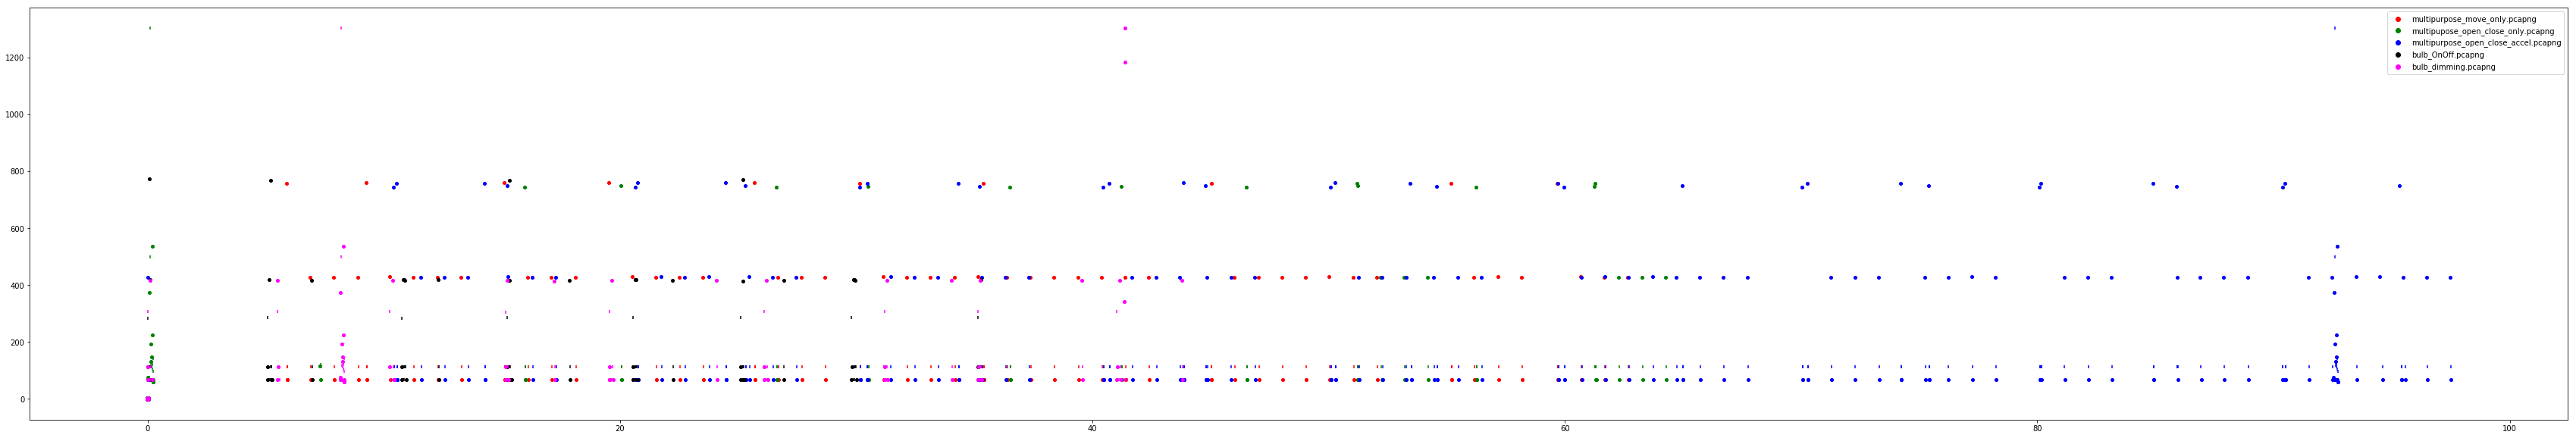

In [63]:
plt.figure(figsize=(60,10))
mycolors = ['red','green','blue','black','magenta','cyan', 'yellow']
for file in filePath:
    plt.scatter(0,0,label=file , color=mycolors[ filePath.index(file) ])
    packets = rdpcap(os.path.join( '/home/omid/research/iot/IoT-Project/files/' , file))
    t0 = packets[0].time
    for pkt in packets:
        if IP in pkt:
            ip_src=pkt[IP].src
            ip_dst=pkt[IP].dst
        if TCP in pkt :
            tcp_sport=pkt[TCP].sport
            tcp_dport=pkt[TCP].dport
            cnt+=1
            if (pkt.time - t0  < 100):
                plt.scatter( pkt.time - t0 , len(pkt), color=mycolors[ filePath.index(file) ],s=16,  marker='o' if str(ip_src)== '10.42.0.55' else '|' ) 
plt.legend()


NameError: name 'packets' is not defined

393

373

NameError: name 'plt' is not defined